In [596]:
import pandas as pd

df = pd.read_csv("train.csv")  

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [598]:
print("Shape of dataset:", df.shape)

Shape of dataset: (21263, 82)


In [600]:
print("\nMissing values per column:")
print(df.isnull().sum().head())


Missing values per column:
number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
dtype: int64


In [602]:
print("\nSummary statistics:")
print(df.describe().T.head())


Summary statistics:
                         count       mean        std       min        25%  \
number_of_elements     21263.0   4.115224   1.439295  1.000000   3.000000   
mean_atomic_mass       21263.0  87.557631  29.676497  6.941000  72.458076   
wtd_mean_atomic_mass   21263.0  72.988310  33.490406  6.423452  52.143839   
gmean_atomic_mass      21263.0  71.290627  31.030272  5.320573  58.041225   
wtd_gmean_atomic_mass  21263.0  58.539916  36.651067  1.960849  35.248990   

                             50%         75%       max  
number_of_elements      4.000000    5.000000    9.0000  
mean_atomic_mass       84.922750  100.404410  208.9804  
wtd_mean_atomic_mass   60.696571   86.103540  208.9804  
gmean_atomic_mass      66.361592   78.116681  208.9804  
wtd_gmean_atomic_mass  39.918385   73.113234  208.9804  


In [604]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

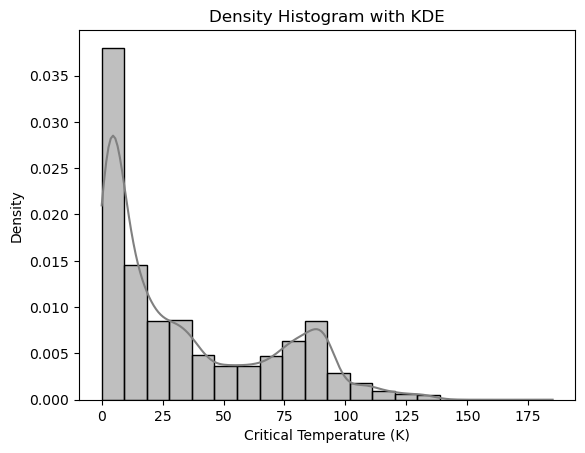

In [606]:
import seaborn as sns

sns.histplot(df['critical_temp'], bins=20, kde=True, stat="density", color="grey")
plt.xlabel("Critical Temperature (K)")
plt.title("Density Histogram with KDE")
#plt.savefig("hist.png", dpi=300, bbox_inches="tight")
plt.show()

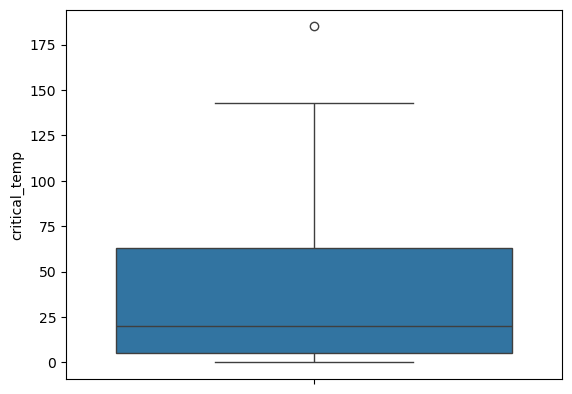

In [608]:
sns.boxplot(y=df['critical_temp'])
#plt.savefig("boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [610]:
import numpy as np

corr_matrix = df.drop("critical_temp", axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly correlated features to drop:", high_corr_features)

Highly correlated features to drop: ['wtd_gmean_atomic_mass', 'std_atomic_mass', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'std_fie', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'wtd_gmean_Density', 'std_Density', 'std_ElectronAffinity', 'wtd_gmean_FusionHeat', 'std_FusionHeat', 'std_ThermalConductivity', 'wtd_std_ThermalConductivity', 'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence', 'std_Valence']


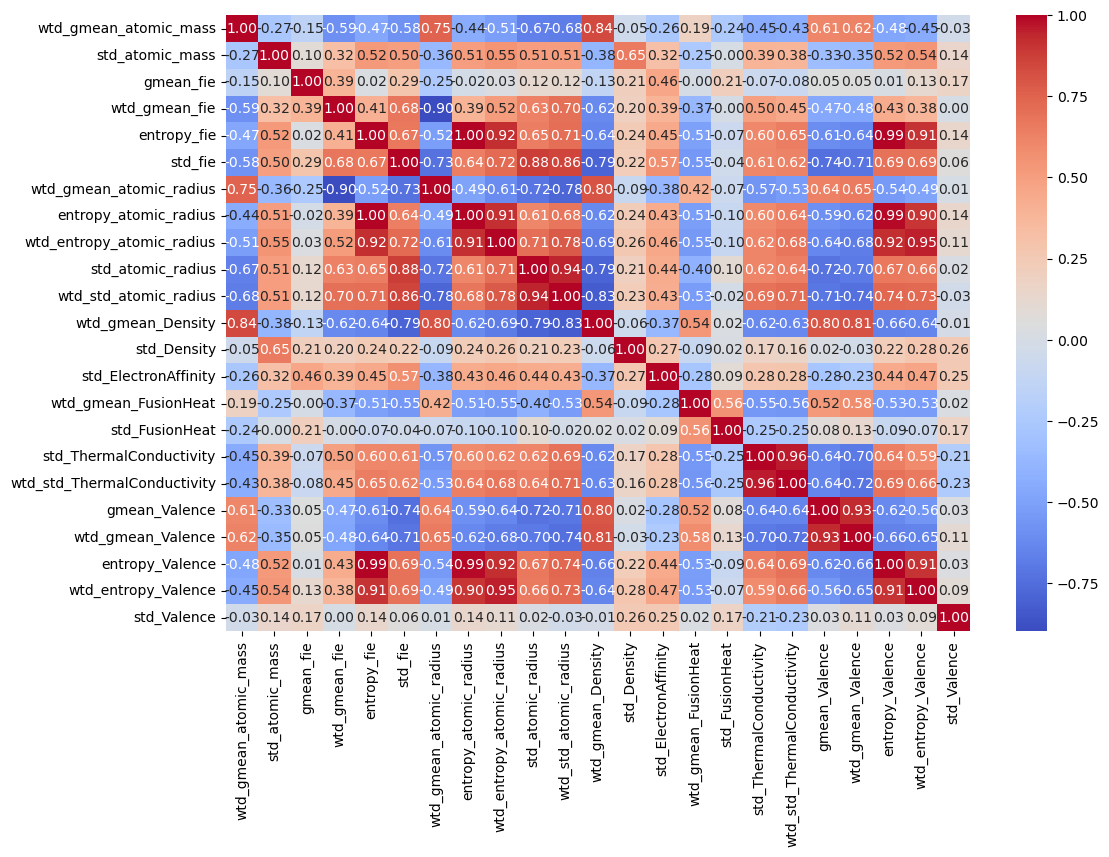

In [612]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the high correlation features
corr_features = df[high_corr_features]

# Compute correlation matrix
corr_matrix = corr_features.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
#plt.title("Heatmap of Highly Correlated Features")
plt.show()

### Drop some of the variables that are highly correlated

In [614]:
print(df.columns.tolist())

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [616]:
drop = [
    "entropy_fie",
    "entropy_Valence",
]


df = df.drop(columns=drop)

print(df.shape)

(21263, 80)


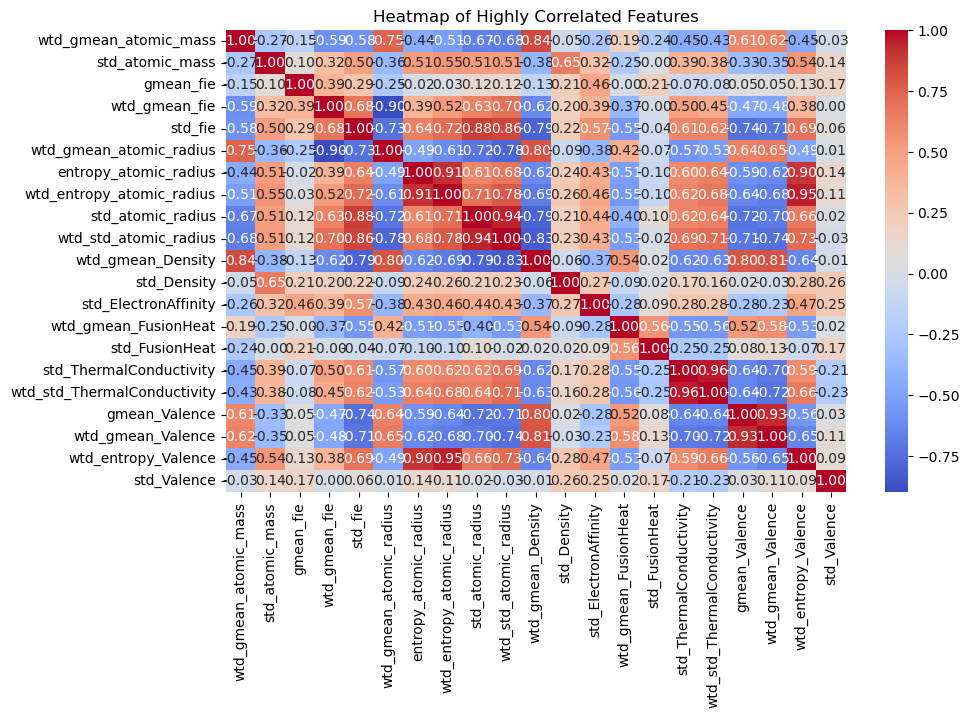

In [618]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in upper.columns if any(upper[col] > 0.95)]

if high_corr_features:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[high_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Heatmap of Highly Correlated Features")
    plt.show()
else:
    print("No features with correlation > 0.95 remain.")

In [620]:
drop = [
    "wtd_gmean_fie",
    "entropy_atomic_radius",
    "std_atomic_radius",
    "wtd_gmean_Valence"
]


df = df.drop(columns=drop)

print(df.shape)

(21263, 76)


In [622]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()

# Extract pairs with correlation >= 0.90
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Filter and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.90]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print(high_corr_pairs)

                       Feature1                     Feature2  Correlation
2748               mean_Valence                gmean_Valence     0.989911
2710  range_ThermalConductivity      std_ThermalConductivity     0.987867
2545           range_FusionHeat               std_FusionHeat     0.984574
1006                  range_fie                      std_fie     0.981628
1291     wtd_mean_atomic_radius      wtd_gmean_atomic_radius     0.980107
2770              range_Valence                  std_Valence     0.973788
2280     range_ElectronAffinity         std_ElectronAffinity     0.973114
2425        wtd_mean_FusionHeat         wtd_gmean_FusionHeat     0.970948
760                    mean_fie                    gmean_fie     0.969325
2711  range_ThermalConductivity  wtd_std_ThermalConductivity     0.965449
148        wtd_mean_atomic_mass        wtd_gmean_atomic_mass     0.964085
445     wtd_entropy_atomic_mass    wtd_entropy_atomic_radius     0.961464
498           range_atomic_mass       

In [624]:
drop = [
    "gmean_Valence",
    "std_FusionHeat",
    "wtd_gmean_atomic_radius",
    "std_Valence",
    "std_ElectronAffinity",
    "wtd_gmean_FusionHeat",
    "gmean_fie",
    "mean_fie",
    "mean_atomic_mass",
    "gmean_atomic_mass",
    "wtd_std_fie",
    "entropy_atomic_mass",
    "entropy_Density",
    "entropy_FusionHeat",
    "mean_FusionHeat",
    "gmean_FusionHeat",
    "wtd_std_FusionHeat",
    "mean_atomic_radius",
    "gmean_atomic_radius",
    "range_FusionHeat",
    "wtd_entropy_FusionHeat"
]


df = df.drop(columns=drop)

print(df.shape)

(21263, 55)


In [626]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Filter and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.80]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print(high_corr_pairs)

                          Feature1                       Feature2  Correlation
1387     range_ThermalConductivity        std_ThermalConductivity     0.987867
486                      range_fie                        std_fie     0.981628
1388     range_ThermalConductivity    wtd_std_ThermalConductivity     0.965449
53            wtd_mean_atomic_mass          wtd_gmean_atomic_mass     0.964085
166        wtd_entropy_atomic_mass      wtd_entropy_atomic_radius     0.961464
207              range_atomic_mass                std_atomic_mass     0.960854
967                  range_Density                    std_Density     0.959956
691            range_atomic_radius          wtd_std_atomic_radius     0.958004
1403       std_ThermalConductivity    wtd_std_ThermalConductivity     0.955627
870                  gmean_Density              wtd_gmean_Density     0.951995
686      wtd_entropy_atomic_radius            wtd_entropy_Valence     0.951463
837               wtd_mean_Density              wtd_

In [628]:
drop = [
    "std_ThermalConductivity",
    "std_fie",
    "wtd_gmean_atomic_mass",
    "wtd_entropy_atomic_radius",
    "std_atomic_mass",
    "wtd_std_atomic_radius",
    "gmean_Density",
    "wtd_gmean_Density",
    "wtd_mean_Density",
    "wtd_entropy_Valence",
    "range_Density",
    "wtd_std_Density",
    "wtd_entropy_atomic_mass",
    "entropy_ElectronAffinity",
    "gmean_ThermalConductivity",
    "wtd_entropy_ElectronAffinity",
    "std_fie",
    "range_atomic_mass",
    "range_fie",
    "wtd_range_atomic_mass",
    "wtd_range_Density",
    "range_Valence",
    "wtd_gmean_Density"
]

df = df.drop(columns=drop)

print(df.shape)

(21263, 34)


In [630]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Filter and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.70]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print(high_corr_pairs)

                         Feature1                         Feature2  \
508     range_ThermalConductivity      wtd_std_ThermalConductivity   
522                  mean_Valence                 wtd_mean_Valence   
339     wtd_mean_ElectronAffinity       wtd_gmean_ElectronAffinity   
437           wtd_mean_FusionHeat             wtd_range_FusionHeat   
477  wtd_mean_ThermalConductivity    wtd_range_ThermalConductivity   
319         mean_ElectronAffinity           gmean_ElectronAffinity   
95                   wtd_mean_fie           wtd_mean_atomic_radius   
393        range_ElectronAffinity         wtd_std_ElectronAffinity   
341     wtd_mean_ElectronAffinity       wtd_range_ElectronAffinity   
6              number_of_elements              range_atomic_radius   
9              number_of_elements              wtd_entropy_Density   
127               wtd_entropy_fie              wtd_entropy_Density   
492   entropy_ThermalConductivity  wtd_entropy_ThermalConductivity   
224           range_

In [632]:
drop = [
    "wtd_std_ThermalConductivity",
    "mean_Valence",
    "range_ElectronAffinity",
    "mean_ElectronAffinity",
    "gmean_ElectronAffinity",
    "wtd_entropy_fie",
    "entropy_ThermalConductivity",
    "mean_Density"
]

df = df.drop(columns=drop)

print(df.shape)

(21263, 26)


In [634]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Filter and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.60]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print(high_corr_pairs)

                         Feature1                       Feature2  Correlation
195     wtd_mean_ElectronAffinity     wtd_gmean_ElectronAffinity     0.899739
245           wtd_mean_FusionHeat           wtd_range_FusionHeat     0.876764
275  wtd_mean_ThermalConductivity  wtd_range_ThermalConductivity     0.876294
70                   wtd_mean_fie         wtd_mean_atomic_radius     0.869916
196     wtd_mean_ElectronAffinity     wtd_range_ElectronAffinity     0.793244
5              number_of_elements            range_atomic_radius     0.768060
7              number_of_elements            wtd_entropy_Density     0.767078
144           range_atomic_radius               wtd_mean_Valence     0.756621
291     range_ThermalConductivity               wtd_mean_Valence     0.743370
142           range_atomic_radius      range_ThermalConductivity     0.736137
69                   wtd_mean_fie                  wtd_range_fie     0.724828
162       wtd_range_atomic_radius              wtd_range_Valence

In [636]:
drop = [
    "wtd_gmean_ElectronAffinity",
    "wtd_range_FusionHeat",
    "wtd_range_ThermalConductivity",
    "wtd_mean_fie",
    "range_atomic_radius",
    "mean_ThermalConductivity",
    "number_of_elements",
    "std_Density"
]

df = df.drop(columns=drop)

print(df.shape)

(21263, 18)


In [638]:
corr_matrix = df.drop("critical_temp", axis=1).corr().abs()

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]

# Filter and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"] >= 0.60]
high_corr_pairs = high_corr_pairs.sort_values(by="Correlation", ascending=False)

print(high_corr_pairs)

                      Feature1                    Feature2  Correlation
81   wtd_mean_ElectronAffinity  wtd_range_ElectronAffinity     0.793244
130  range_ThermalConductivity            wtd_mean_Valence     0.743370
68     wtd_range_atomic_radius           wtd_range_Valence     0.722955
35               wtd_range_fie  wtd_range_ElectronAffinity     0.685418
133           wtd_mean_Valence           wtd_range_Valence     0.683700
2         wtd_mean_atomic_mass      wtd_mean_atomic_radius     0.660011
31               wtd_range_fie      wtd_mean_atomic_radius     0.649382
45      wtd_mean_atomic_radius     wtd_range_atomic_radius     0.608917


In [640]:
print(df.columns.tolist())

['wtd_mean_atomic_mass', 'wtd_std_atomic_mass', 'wtd_range_fie', 'wtd_mean_atomic_radius', 'wtd_range_atomic_radius', 'wtd_entropy_Density', 'wtd_mean_ElectronAffinity', 'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity', 'wtd_mean_FusionHeat', 'wtd_mean_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'wtd_entropy_ThermalConductivity', 'range_ThermalConductivity', 'wtd_mean_Valence', 'wtd_range_Valence', 'wtd_std_Valence', 'critical_temp']


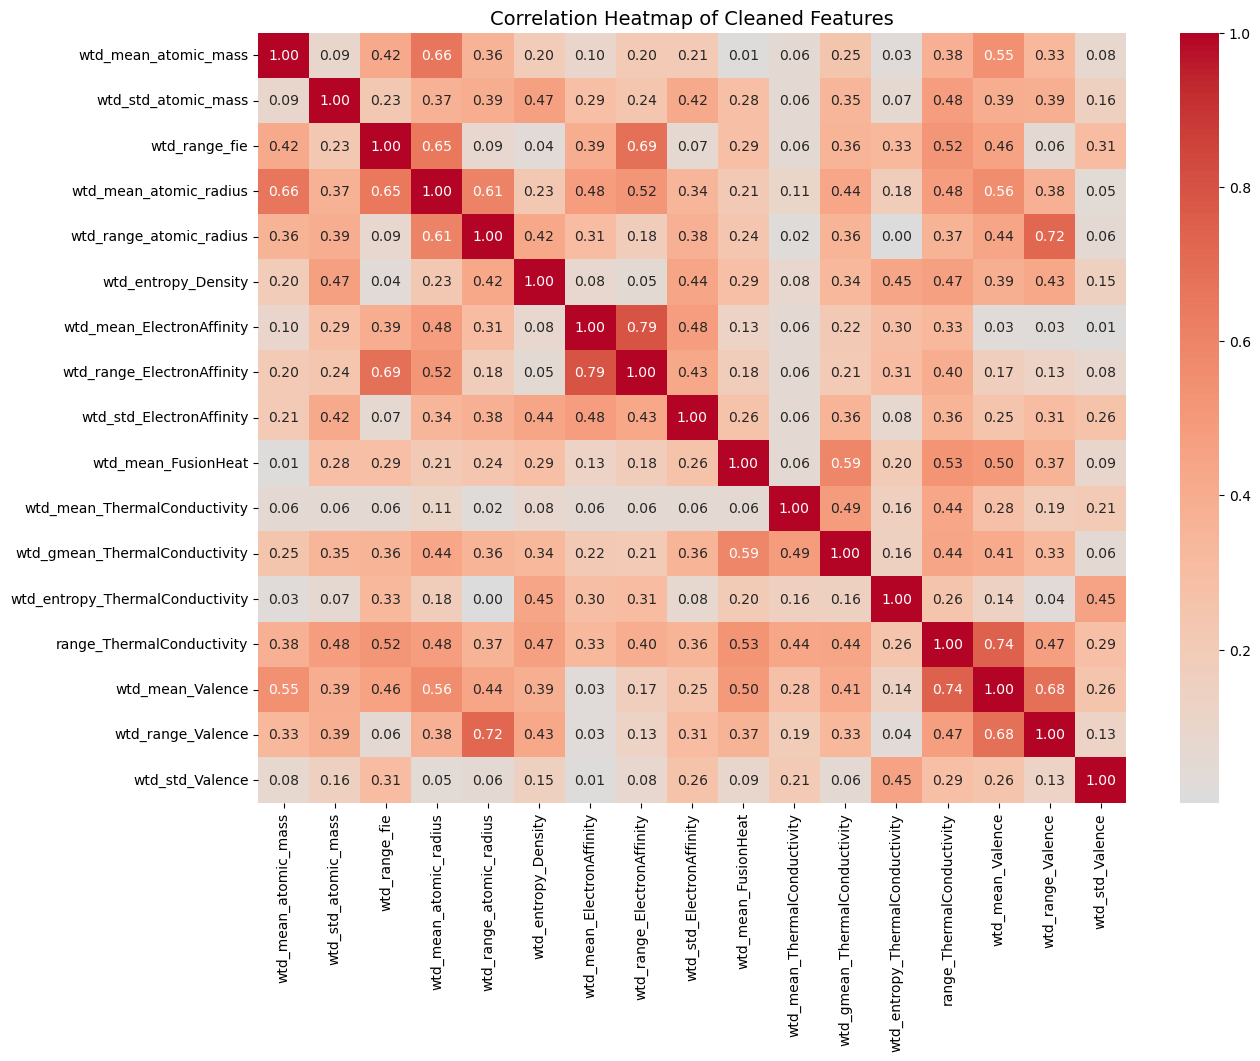

In [642]:
plt.figure(figsize=(14,10))

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")
      
plt.title("Correlation Heatmap of Cleaned Features", fontsize=14)
#plt.savefig("corr.png", dpi=300, bbox_inches="tight")
plt.show()

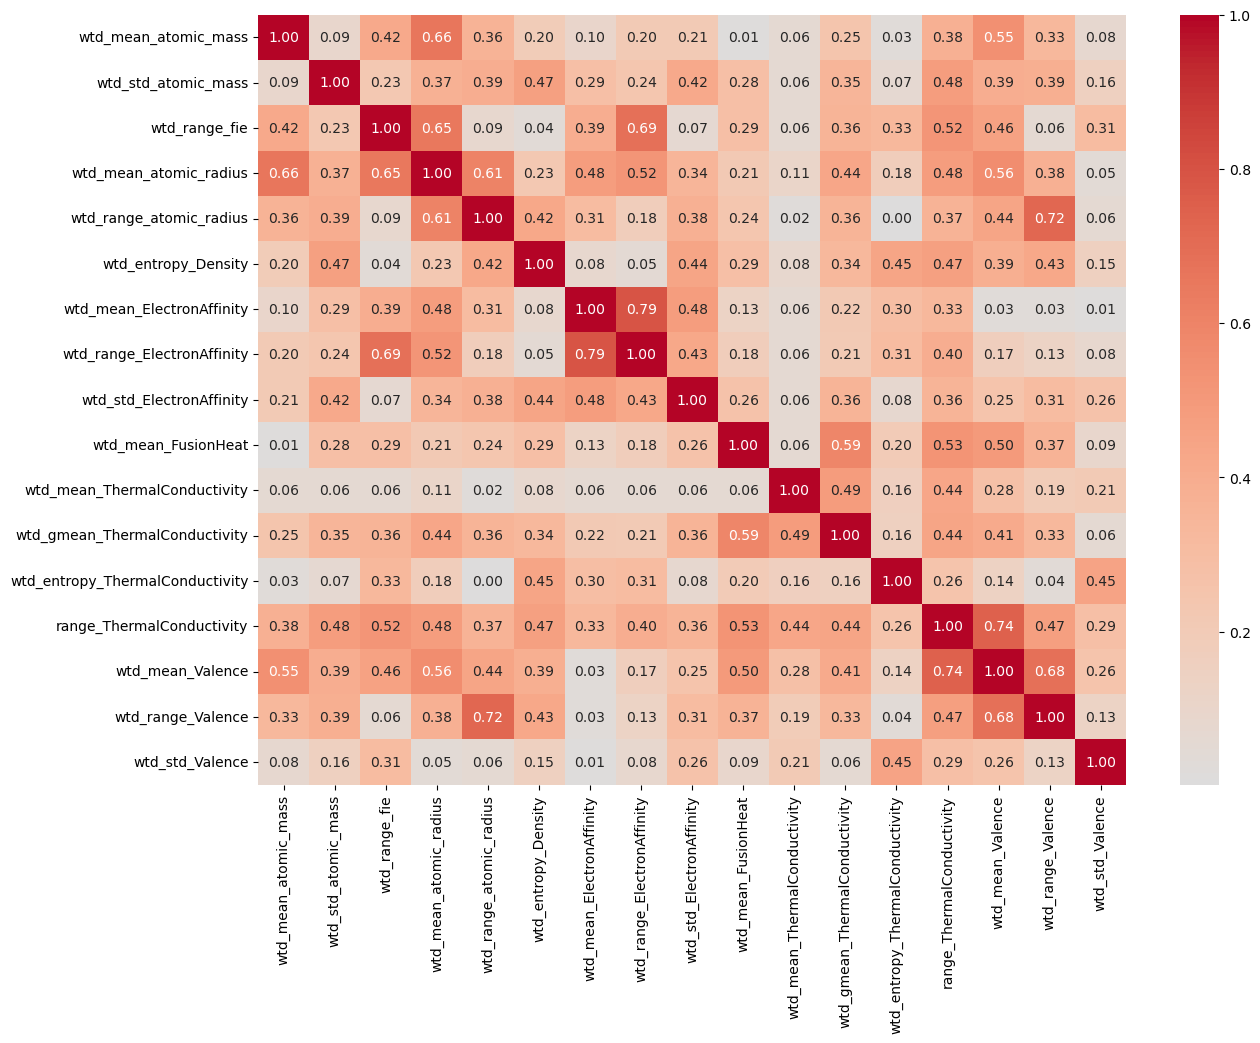

In [644]:
plt.figure(figsize=(14,10))

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f")

#plt.savefig("corr.png", dpi=300, bbox_inches="tight")
plt.show()

In [646]:
X = df.drop("critical_temp", axis=1)
y = df["critical_temp"]

In [648]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (14884, 17) (14884,)
Test shape: (6379, 17) (6379,)


In [650]:
import statsmodels.api as sm

# Add intercept
X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1600.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:16:49   Log-Likelihood:                -66008.
No. Observations:               14884   AIC:                         1.321e+05
Df Residuals:                   14866   BIC:                         1.322e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### "wtd_mean_FusionHeat" is not statistically significant at 95% confidence interval. So this is reomoved for the next iteration

In [652]:
df = df.drop(columns=["wtd_mean_FusionHeat"])

In [654]:
X = df.drop("critical_temp", axis=1)
y = df["critical_temp"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [656]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1700.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:16:58   Log-Likelihood:                -66010.
No. Observations:               14884   AIC:                         1.321e+05
Df Residuals:                   14867   BIC:                         1.322e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### "wtd_mean_atomic_mass" is not statistically significant at 95% confidence interval. So this is reomoved for the next iteration

In [658]:
df = df.drop(columns=["wtd_mean_atomic_mass"])

In [660]:
X = df.drop("critical_temp", axis=1)
y = df["critical_temp"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [662]:
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          critical_temp   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1813.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:17:06   Log-Likelihood:                -66011.
No. Observations:               14884   AIC:                         1.321e+05
Df Residuals:                   14868   BIC:                         1.322e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [668]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_train_pred = model.predict(X_train_const)
y_test_pred = model.predict(sm.add_constant(X_test))

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Performance:")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R²:", train_r2)
print("Test R²:", test_r2)

Model Performance:
Train MSE: 416.6426483111001
Test MSE: 423.87137961484046
Train RMSE: 20.41182618755853
Test RMSE: 20.588136866041097
Train MAE: 15.977492346886518
Test MAE: 16.012910924101586
Train R²: 0.6465196060460111
Test R²: 0.6348126316934017


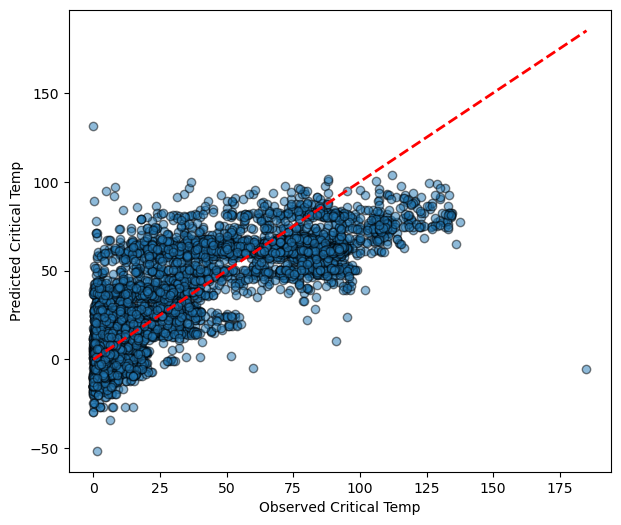

In [554]:
import matplotlib.pyplot as plt

# Predictions
y_test_pred = model.predict(sm.add_constant(X_test))  

# Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2)

# Labels
plt.xlabel("Observed Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.savefig("lrmodel.png", dpi=300, bbox_inches="tight")
plt.show()

#### KNN

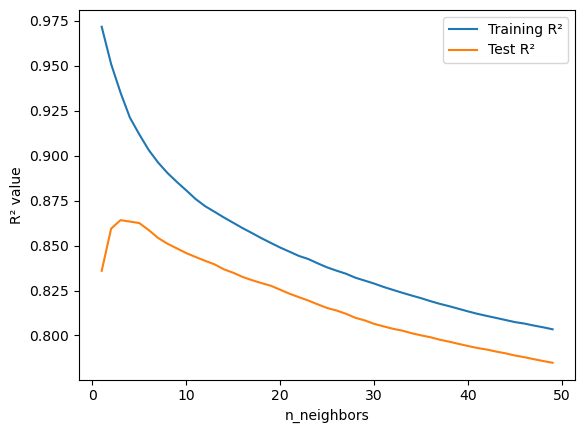

In [558]:
from sklearn.neighbors import KNeighborsRegressor

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 50
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training R²")
plt.plot(neighbors_settings, test_accuracy, label="Test R²")
plt.ylabel("R² value")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("knn.png", dpi=300, bbox_inches="tight")
plt.show()

In [670]:
from sklearn.neighbors import KNeighborsRegressor

# split the wave dataset into a training and a test set
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [672]:
y_pred=reg.predict(X_test)

In [674]:
len(y_pred)

6379

In [676]:
len(y_test)

6379

In [678]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.86


In [682]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Metrics:")
print(" MSE = {:.3f}".format(train_mse))
print(" RMSE = {:.3f}".format(train_rmse))
print(" MAE = {:.3f}".format(train_mae))
print(" R² = {:.3f}".format(train_r2))

print("\nTest Metrics:")
print(" MSE = {:.3f}".format(test_mse))
print(" RMSE = {:.3f}".format(test_rmse))
print(" MAE = {:.3f}".format(test_mae))
print(" R² = {:.3f}".format(test_r2))

Training Metrics:
 MSE = 76.419
 RMSE = 8.742
 MAE = 4.793
 R² = 0.935

Test Metrics:
 MSE = 157.671
 RMSE = 12.557
 MAE = 7.002
 R² = 0.864


### Random Forest

In [684]:
import pandas as pd

df = pd.read_csv("train.csv")  

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [688]:
print(df.columns.tolist())

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

In [690]:
X = df.drop("critical_temp", axis=1)
y = df["critical_temp"]

In [692]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (14884, 81) (14884,)
Test shape: (6379, 81) (6379,)


In [694]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


rf = RandomForestRegressor(
    n_estimators=200,      
    random_state=42,
    n_jobs=-1             
)

# Train
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Random Forest Performance:")
print("Train -> MSE:", train_mse, " RMSE:", train_rmse, " MAE:", train_mae, " R²:", train_r2)
print("Test  -> MSE:", test_mse, " RMSE:", test_rmse, " MAE:", test_mae, " R²:", test_r2)

Random Forest Performance:
Train -> MSE: 25.082815252360003  RMSE: 5.0082746782060585  MAE: 2.6288669110667073  R²: 0.9787196931163441
Test  -> MSE: 92.3366373332083  RMSE: 9.60919545712378  MAE: 5.318970075056354  R²: 0.9204471563599419


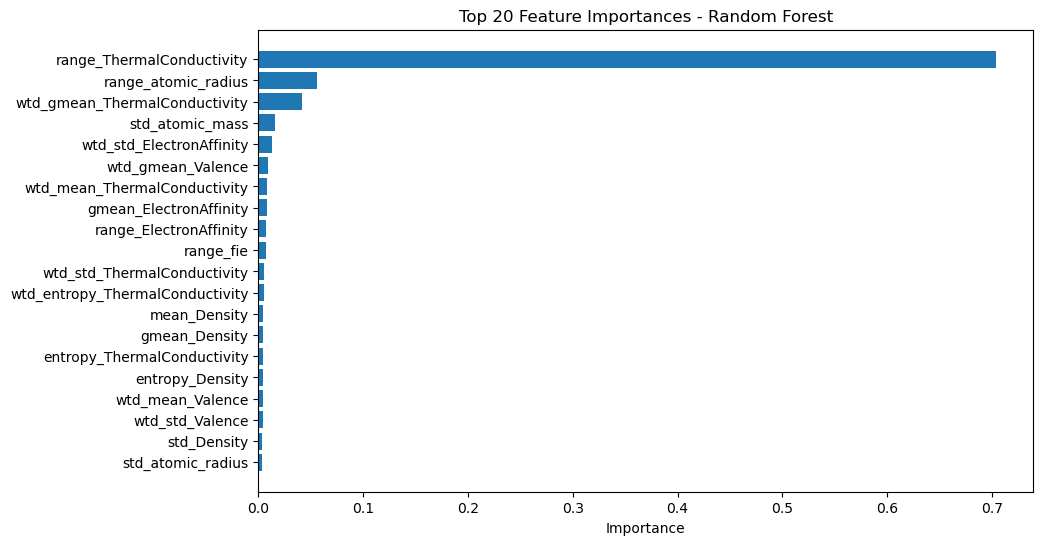

In [584]:
# Feature Importance (top 20 features)
importances = rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"].head(20), feat_imp["Importance"].head(20))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()

### XGBOOST

In [696]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


xgb = XGBRegressor(
    n_estimators=500,       
    learning_rate=0.05,     
    max_depth=6,            
    subsample=0.8,          
    colsample_bytree=0.8,   
    random_state=42,
    n_jobs=-1               
)

# Train
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("XGBoost Performance:")
print("Train -> MSE:", train_mse, " RMSE:", train_rmse, " MAE:", train_mae, " R²:", train_r2)
print("Test  -> MSE:", test_mse, " RMSE:", test_rmse, " MAE:", test_mae, " R²:", test_r2)

XGBoost Performance:
Train -> MSE: 34.48965453106525  RMSE: 5.872789331405073  MAE: 3.719119908175255  R²: 0.9707389132620077
Test  -> MSE: 90.24616418837755  RMSE: 9.49979811303259  MAE: 5.634674830466537  R²: 0.9222482083370064


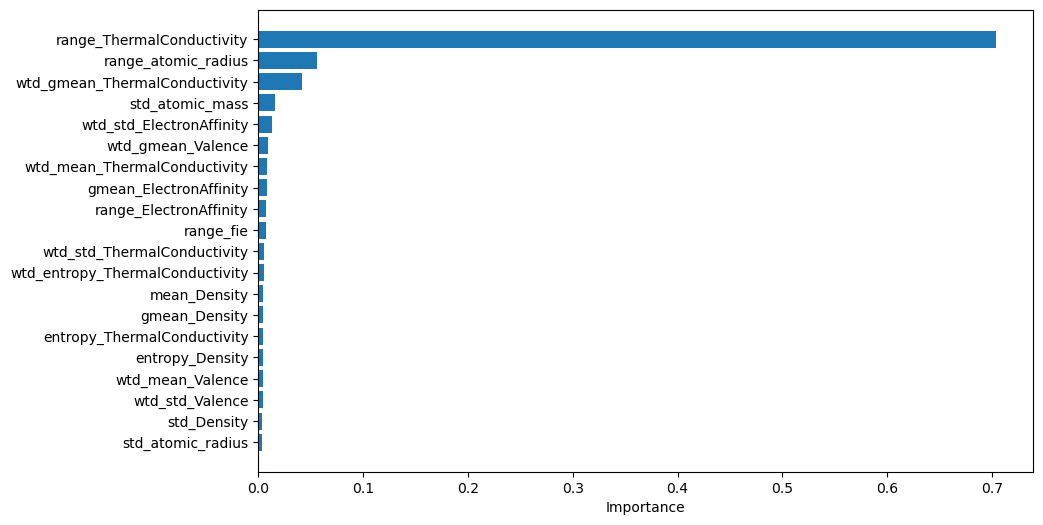

In [590]:
# Feature Importance 
importances = xgb.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"].head(20), feat_imp["Importance"].head(20))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.savefig("feature.png", dpi=300, bbox_inches="tight")
plt.show()

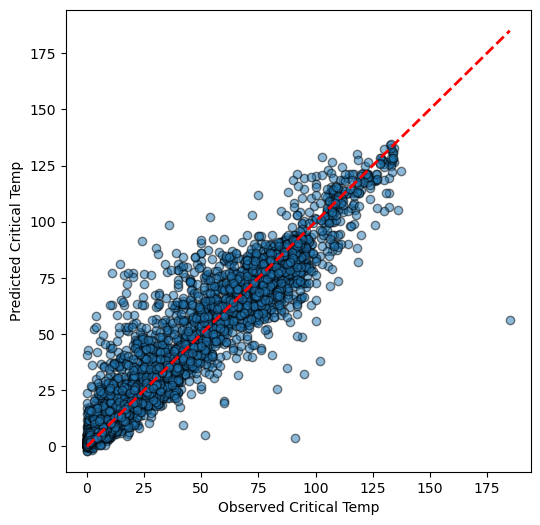

In [588]:
import matplotlib.pyplot as plt


y_test_pred = xgb.predict(X_test)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Observed Critical Temp")
plt.ylabel("Predicted Critical Temp")
plt.savefig("xgboost.png", dpi=300, bbox_inches="tight")
plt.show()

### Bias-Variance 

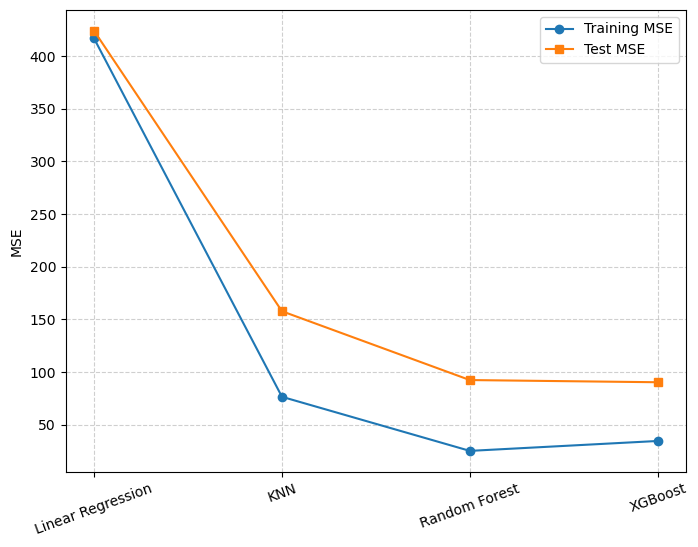

In [702]:
import matplotlib.pyplot as plt
import numpy as np

# Your RMSE values
train_mse = {
    "Linear Regression": 416.64,
    "KNN": 76.42,
    "Random Forest": 25.08,
    "XGBoost": 34.49
}

test_mse = {
    "Linear Regression": 423.87,
    "KNN": 157.67,
    "Random Forest": 92.33,
    "XGBoost": 90.25
}

models = list(train_mse.keys())
x = np.arange(len(models))

plt.figure(figsize=(8,6))
plt.plot(x, list(train_mse.values()), marker='o', label="Training MSE")
plt.plot(x, list(test_mse.values()), marker='s', label="Test MSE")

plt.xticks(x, models, rotation=20)
plt.ylabel("MSE")

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("bv.png", dpi=300, bbox_inches="tight")
plt.show()